In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_imported=pd.read_csv("StrongPasswordData.csv")

data_imported.tail()


,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
20395,s057,8,46,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,...,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,s057,8,47,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,...,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,s057,8,48,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,...,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,s057,8,49,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,...,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931
20399,s057,8,50,0.0596,0.1310,0.0714,0.0992,0.1103,0.0111,0.0998,...,0.0969,0.0784,-0.0185,0.0790,0.1133,0.0343,0.0807,0.1993,0.1186,0.1018


In [2]:
data_imported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

In [3]:

# generation of the datasets
data_imported_s00 = {}
X = {}

for i in range(2, 58):
    if i not in [6, 9, 14, 23, 45]:
        sujet = f's{i:03d}'
        for j in range(1, 9):
            condition = (data_imported['subject'] == sujet) & (data_imported['sessionIndex'] == j)
            data_imported_s00[sujet,j] = data_imported[condition]
            X[sujet,j] = data_imported_s00[sujet,j].drop(data_imported_s00[sujet,j].columns[[0, 1, 2]], axis=1)
            



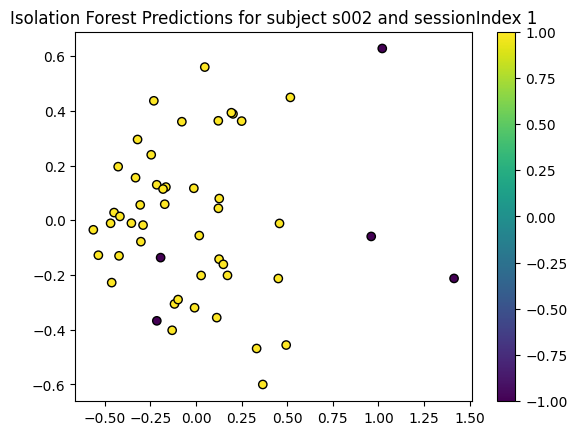

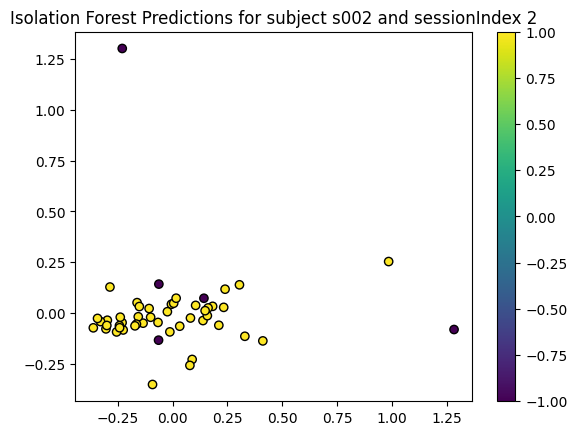

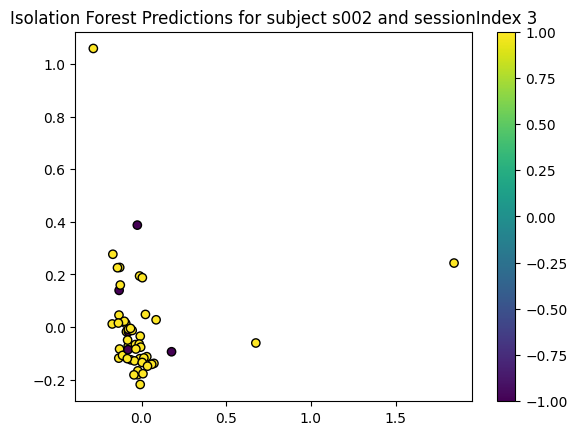

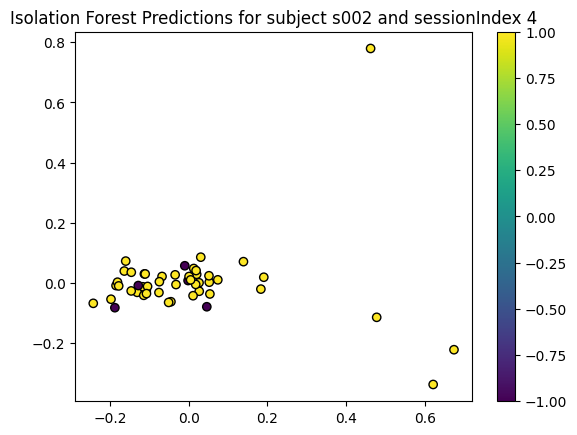

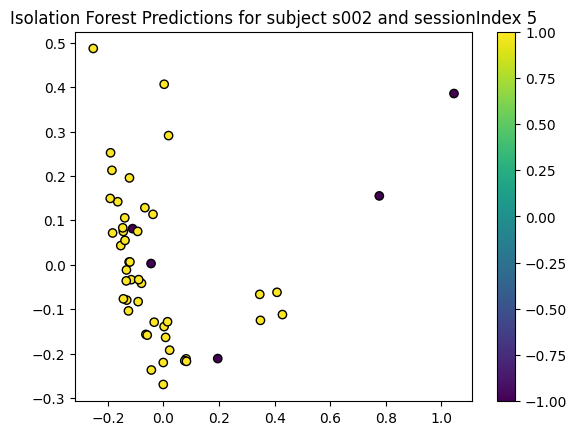

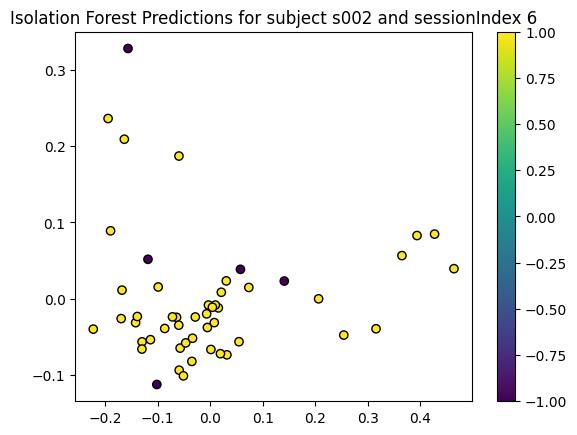

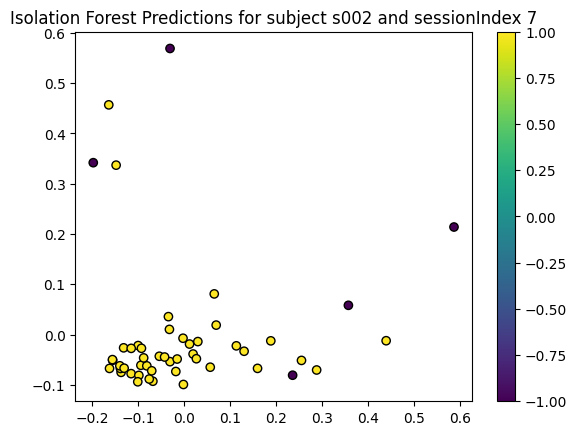

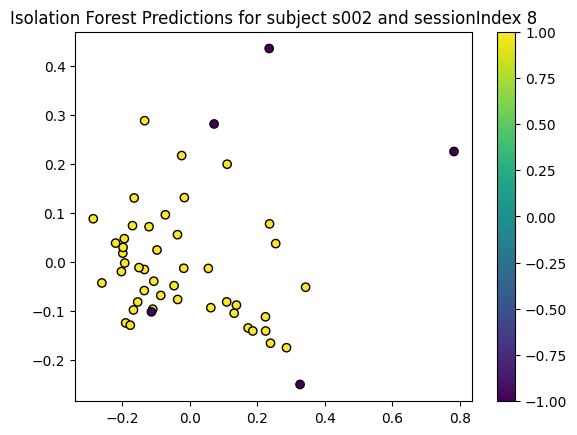

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


models_IF = {}
models_PCA = {}

# Lists to store mean and variance values
means = []
variances = []

for i in range(2, 3):##58 for having all the points instead of 3
    if i not in [6, 9, 14, 23, 45]:
        sujet = f's{i:03d}'
        for j in range(1, 9):
            
            model_IF = IsolationForest(contamination=0.1)
            model_IF.fit(X[sujet,j])
            models_IF[sujet,j] = model_IF

            
            model_PCA = PCA(n_components=2)
            X_reduced = model_PCA.fit_transform(X[sujet,j])
            models_PCA[sujet,j] = model_PCA

        
            
            model_IF.predict(X[sujet,j])# for predicting whether the point is an anomaly or not

            plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model_IF.predict(X[sujet,j]), cmap='viridis', marker='o', edgecolors='k')
            plt.title(f'Isolation Forest Predictions for subject {sujet} and sessionIndex {j}')
            plt.colorbar()
            plt.show()

            



c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


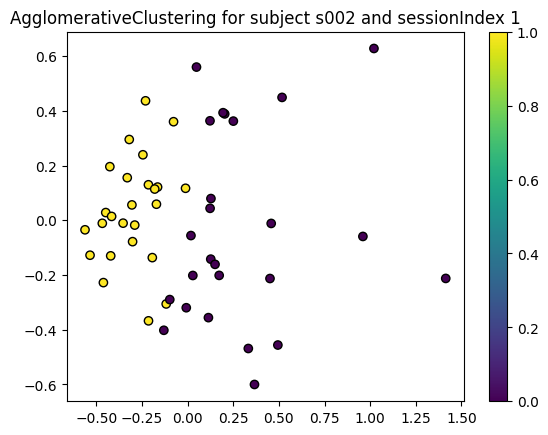

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


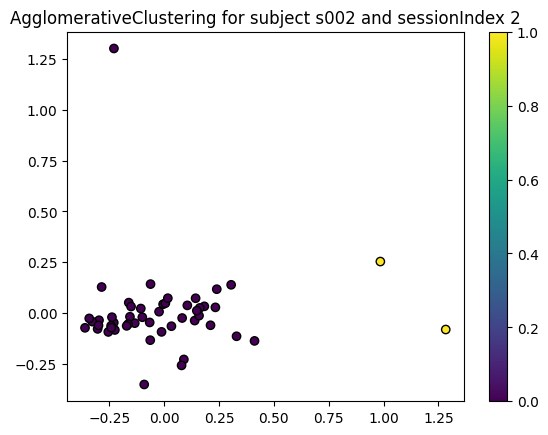

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


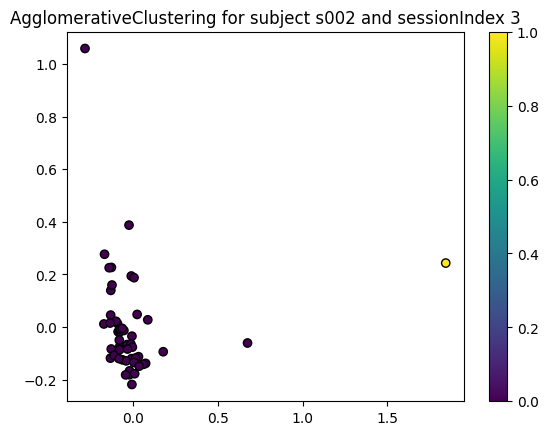

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


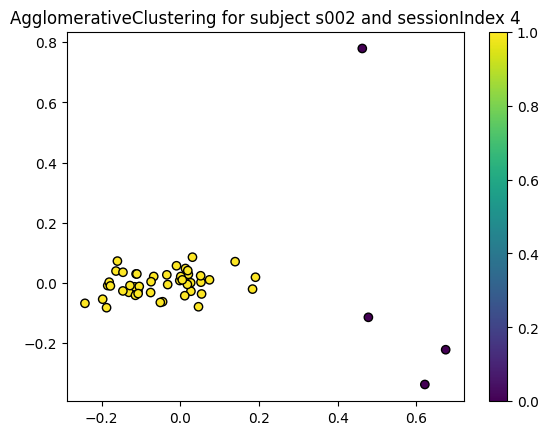

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


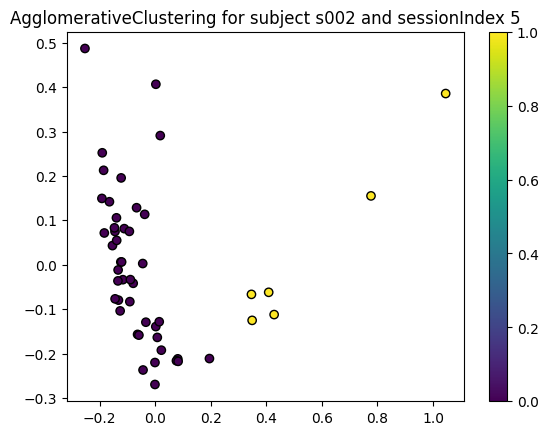

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


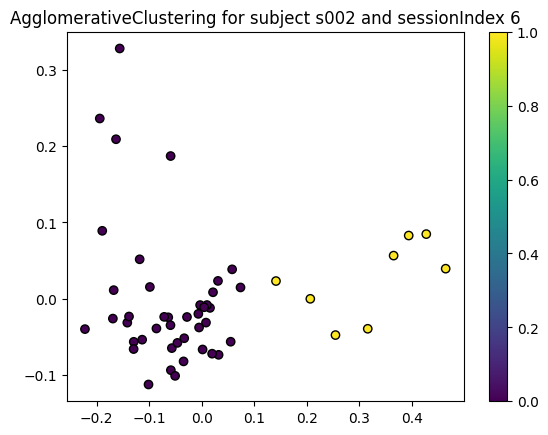

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


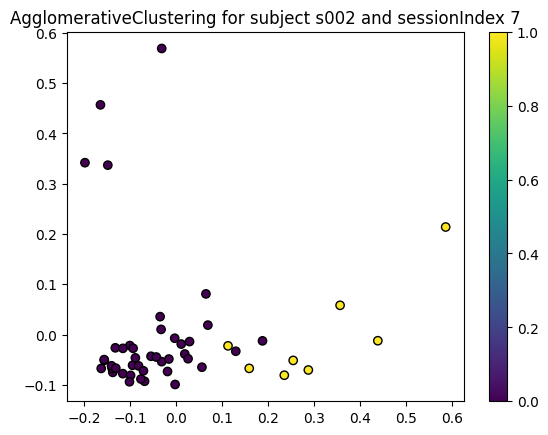

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


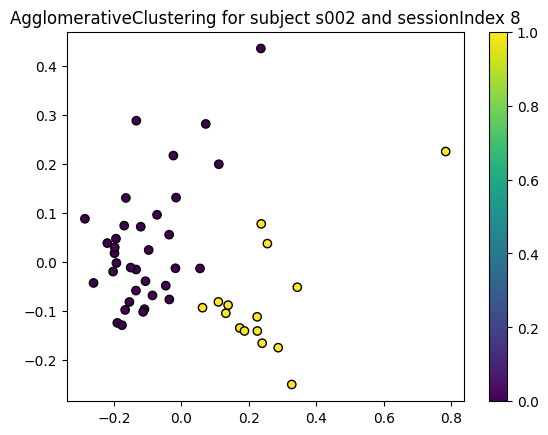

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

models_KMeans = {}
models_PCA = {}





for i in range(2, 3):#58 for having all the points instead of 3
    if i not in [6, 9, 14, 23, 45]:
        sujet = f's{i:03d}'
        for j in range(1, 9):
    
            
            model_Agglomerative = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
            model_Agglomerative.fit(X[sujet,j])
            model_Agglomerative.fit_predict(X[sujet,j])

            # Create the model for having only two dimensions
            model_PCA = PCA(n_components=2)
            X_reduced = model_PCA.fit_transform(X[sujet,j])
            
            
            #To plot the model in 2 dimensions and see the anomalies
            
            plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=model_Agglomerative.labels_, cmap='viridis', marker='o', edgecolors='k')
            plt.title(f'AgglomerativeClustering for subject {sujet} and sessionIndex {j}')
            plt.colorbar()
            plt.show()
            


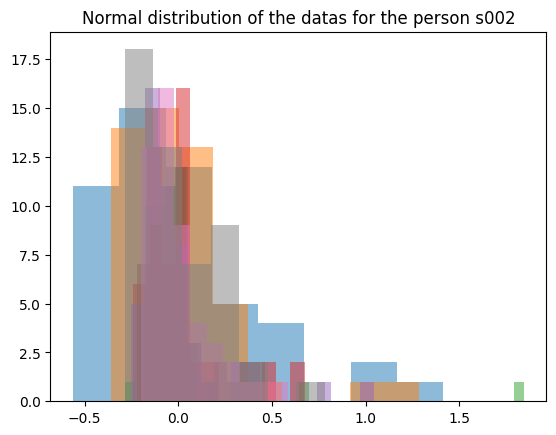

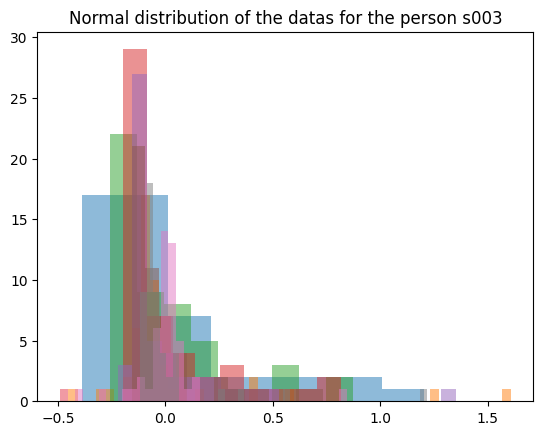

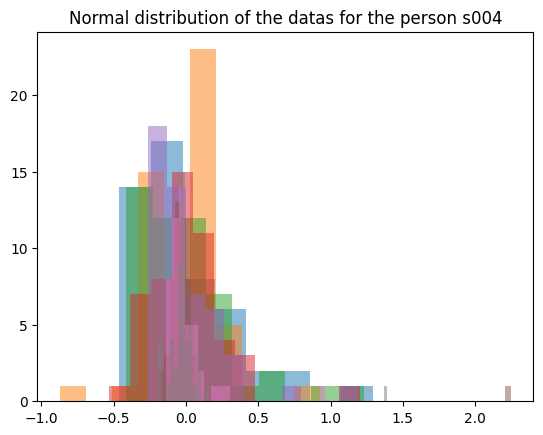

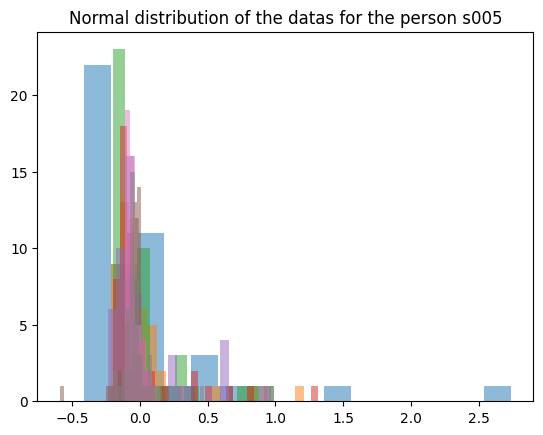

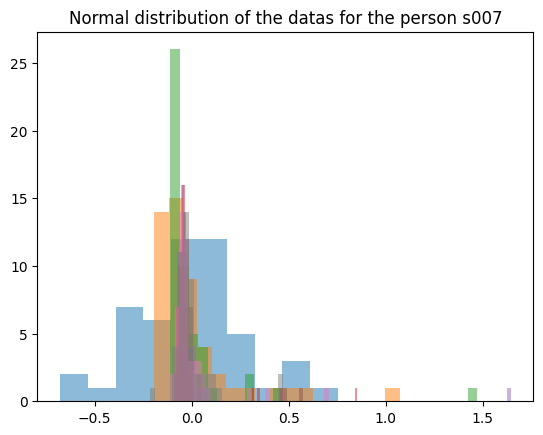

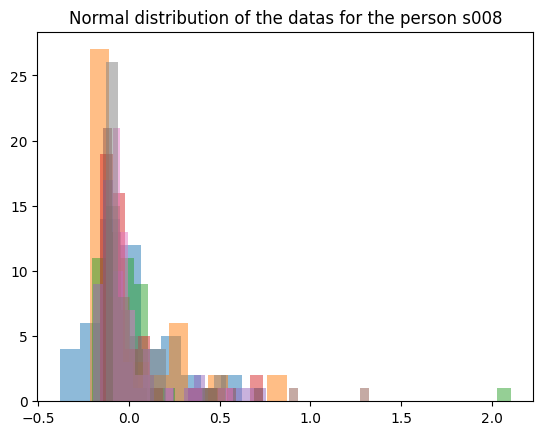

In [6]:
for i in range(2, 10):##58 for having all the points instead of 10
    if i not in [6, 9, 14, 23, 45]:
        sujet = f's{i:03d}'
        for j in range(1, 9):
            # Create the model for having only two dimensions
            model_PCA = PCA(n_components=2)
            X_reduced = model_PCA.fit_transform(X[sujet,j])
            # Visualize histograms for one feature (e.g., the first dimension)
            #for seeing that the datas follow a normal law
            plt.hist(X_reduced[:, 0], bins='auto', alpha=0.5, label=f'Subject {sujet}, Session {j}')
            plt.title(f"Normal distribution of the datas for the person s{i:03d}")
            
        plt.show()

            
            

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


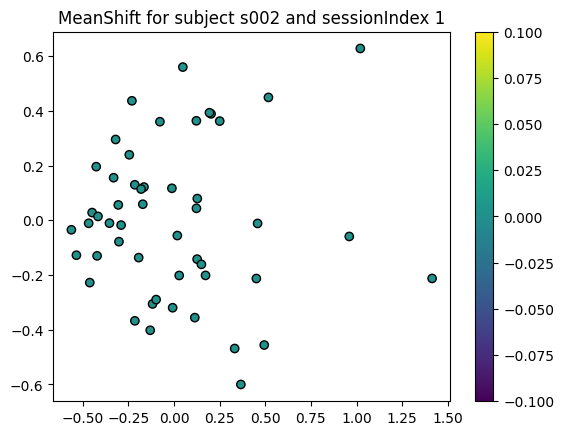

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


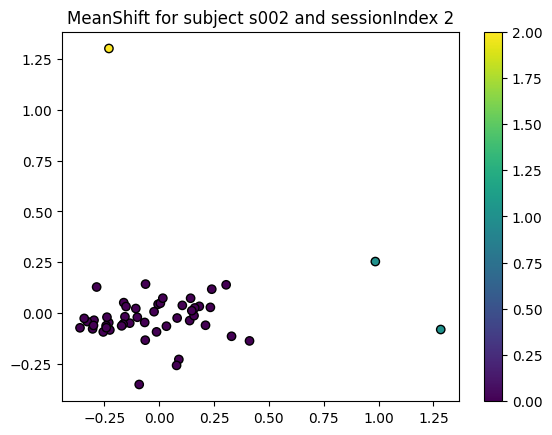

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


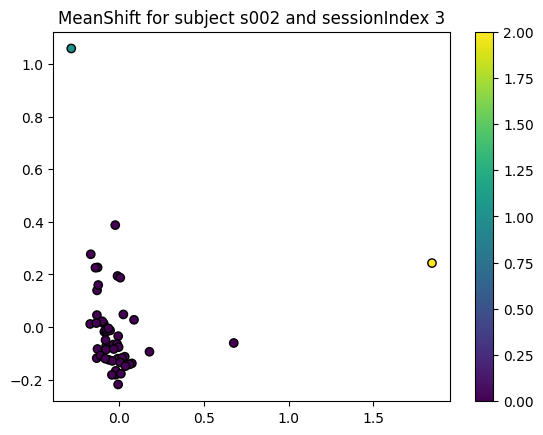

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


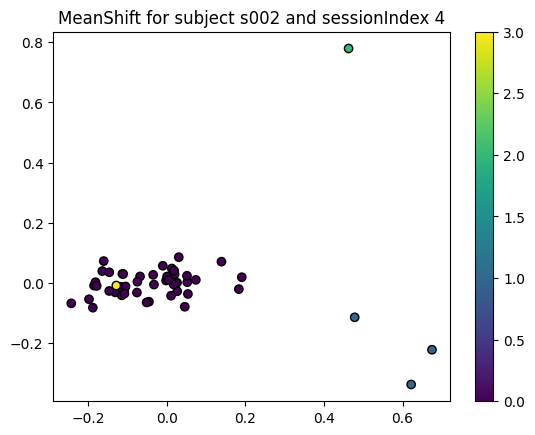

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


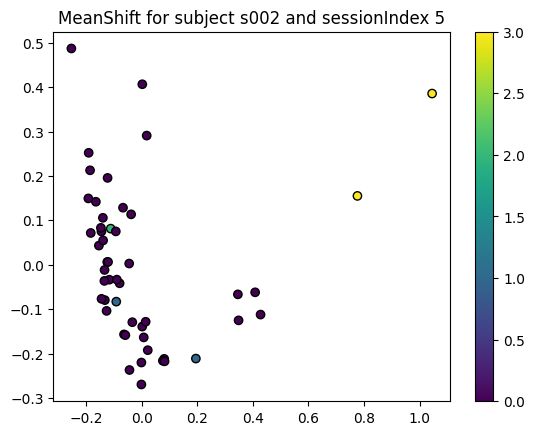

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


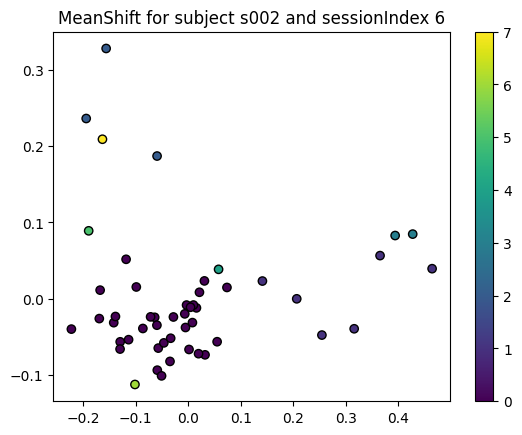

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


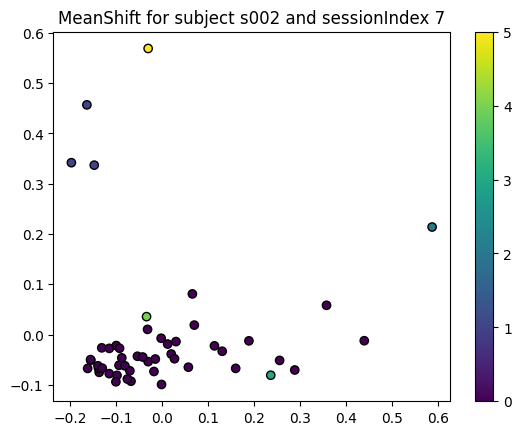

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


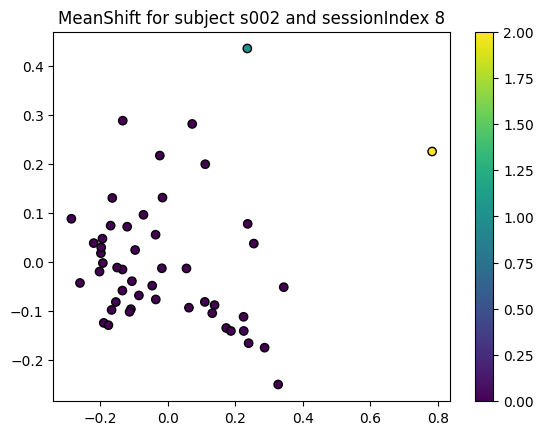

In [7]:


from sklearn.cluster import MeanShift


for i in range(2, 3):#58 for having all the points instead of 3
    if i not in [6, 9, 14, 23, 45]:
        sujet = f's{i:03d}'
        for j in range(1, 9):
            mu=np.mean(X[sujet,j])
            sigma=np.sum(np.var(X[sujet,j]))
            model_MS = MeanShift(bandwidth=4*sigma)
            model_MS.fit(X[sujet,j])
            # Créer le modèle PCA
            model_PCA_2 = PCA(n_components=2)
            X_reduced_2 = model_PCA_2.fit_transform(X[sujet,j])
            
            plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=model_MS.labels_, cmap='viridis', marker='o', edgecolors='k')
            plt.title(f'MeanShift for subject {sujet} and sessionIndex {j}')
            plt.colorbar()
            plt.show()
            
            

            
            
